In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [23]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv', sep=';')

In [24]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
#Preprocessing Data
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [28]:
label_quality = LabelEncoder()

In [29]:
wine['quality'] = label_quality.fit_transform(wine['quality']).astype(str)

In [30]:
wine.head()
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

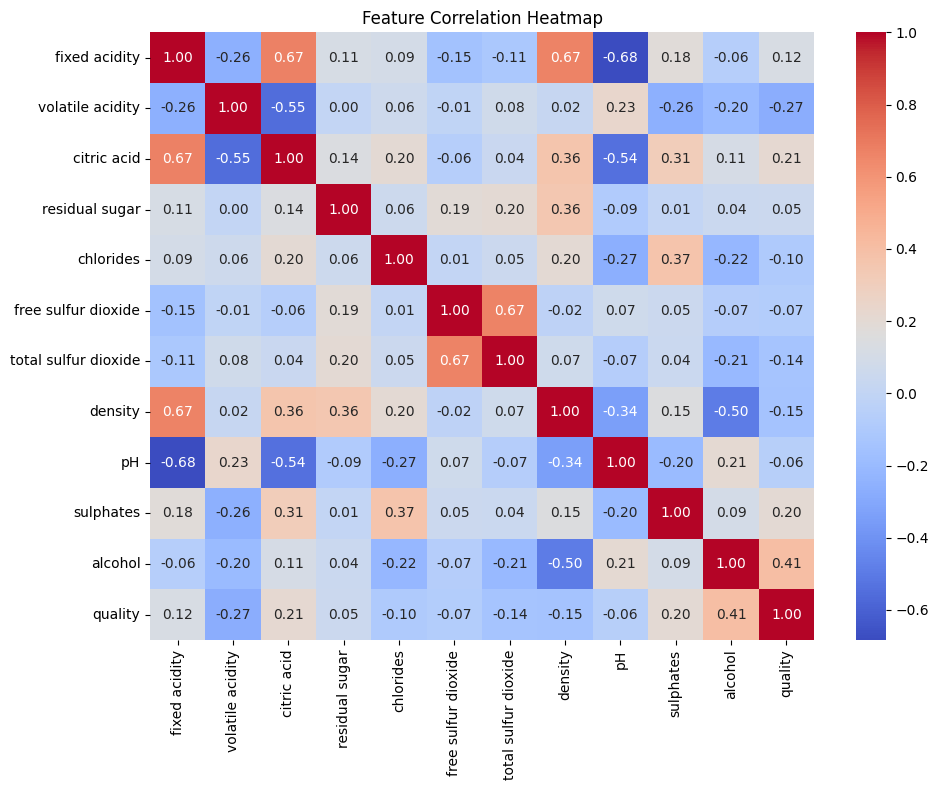

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("assets/feature_correlation.png")  # Save image
plt.show()

C:\Users\kingm\AppData\Local\Temp\ipykernel_74504\1422885393.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= wine['quality'], palette="Set2")


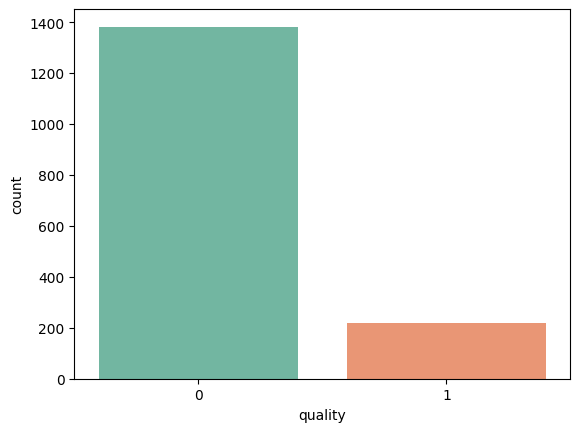

In [52]:
sns.countplot(x= wine['quality'], palette="Set2")
plt.savefig("assets/wine_quality_label.png")

In [33]:
#Now seperate the dataset as response variable and feature variables
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [34]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Random Forest Classifier

In [37]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.72      0.55      0.63        47

    accuracy                           0.90       320
   macro avg       0.82      0.76      0.79       320
weighted avg       0.90      0.90      0.90       320

[[263  10]
 [ 21  26]]


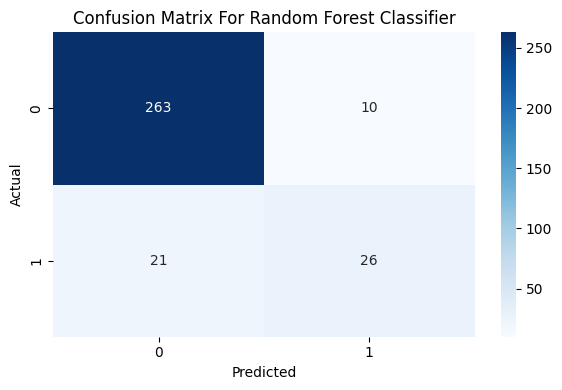

In [58]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

cm_rcf = confusion_matrix(y_test, pred_rfc)

# Plot and save confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rcf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix For Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("assets/confusion_matrix_rcf.png")
plt.show()

SVM Classifier

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


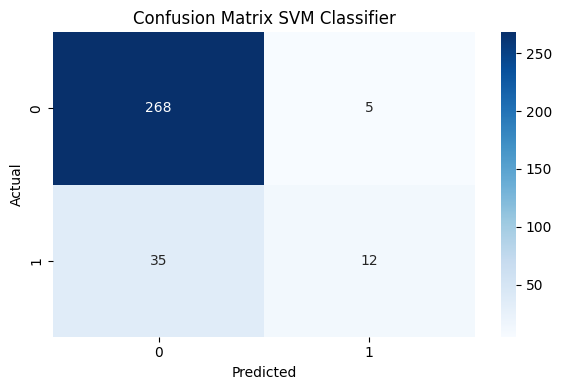

In [59]:
#Let's see how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

# Get the confusion matrix from your prediction
cm_clf = confusion_matrix(y_test, pred_clf)

# Plot and save confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_clf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("assets/confusion_matrix_clf.png")  # Save to your assets folder
plt.show()

Neural Network

In [44]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

c:\Users\kingm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.94      0.93       273
           1       0.59      0.49      0.53        47

    accuracy                           0.88       320
   macro avg       0.75      0.72      0.73       320
weighted avg       0.87      0.88      0.87       320

[[257  16]
 [ 24  23]]


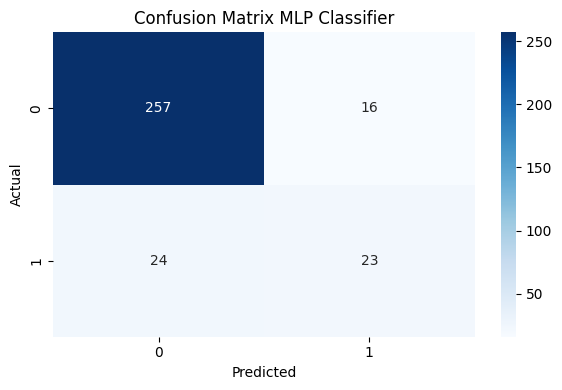

In [62]:
#Let's see how our model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

# Get the confusion matrix from your prediction
cm_mlpc = confusion_matrix(y_test, pred_mlpc)

# Plot and save confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlpc, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("assets/confusion_matrix_mlpc.png")  # Save to your assets folder
plt.show()

In [61]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.903125

In [47]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [48]:
Xnew = [[7.3,0.58,0.00,2.0,0.065,15.0,21.0,0.9946,3.36,0.47,10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

c:\Users\kingm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['0'], dtype=object)

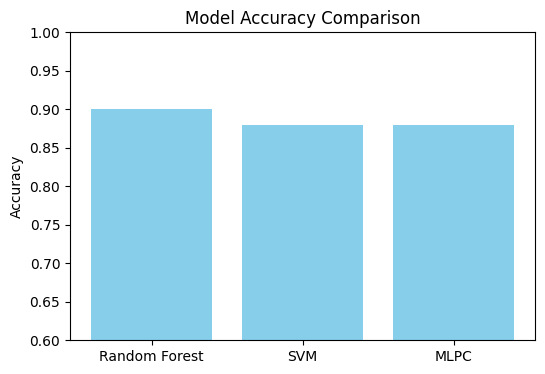

In [63]:
models = ["Random Forest", "SVM", "MLPC"]
accuracy = [0.90, 0.88, 0.88]  # example values

plt.figure(figsize=(6,4))
plt.bar(models, accuracy, color="skyblue")
plt.ylim(0.6, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.savefig("assets/model_accuracy.png")  # save to assets
plt.show()